In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import glob
import sys

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

import torch
import torch.nn as nn

#import lat_dataset_load_new_lightning
import open_worm_lat_dataset_load_new_lightning_dat

from tqdm.notebook import tqdm

In [2]:
"""calculate f"""
def link_per_lat_point(links, lat_size, dims):

    #empty channels where the linsk on other directions should be saved
    #empty_link_channels = np.zeros(links.shape)
    empty_link_channels = torch.zeros(*links.shape, dtype=int)
    for d in range(dims):
        #print(d)
        #print(links)
        d_links = links[d]
        #print(d_links)
        #perm_links = np.roll(d_links, shift=1, axis=d)
        perm_links = torch.roll(d_links, shifts=1, dims=d)
        #print(perm_links)
        
        #print(d_slices)
        #empty_link_channels[d] = links[zip(d_slices)]
        empty_link_channels[d] = perm_links
        
    #not supported
    #empty_link_channels = empty_link_channels[::-1]
    #torch.flip(input=empty_link_channels, dims=[0])
    
    #complete_links = np.concatenate((links,empty_link_channels), axis=0)
    complete_links = torch.cat((links,empty_link_channels), dim=0)
            
            
    return complete_links

def f_calc(k_links, l_links, lat_size, dims):
    full_k_links = link_per_lat_point(k_links, lat_size, dims)
    full_l_links = link_per_lat_point(l_links, lat_size, dims)
    #print(full_k_links.shape)
    #print(full_l_links.shape)
    
    #abs_full_k_links = np.abs(full_k_links)
    abs_full_k_links = torch.abs(full_k_links)
    
    #calc_f = (abs_full_k_links + 2*full_l_links).sum(axis=0).astype(int)
    calc_f = (abs_full_k_links + 2*full_l_links).sum(axis=0)

    #return calc_f.astype(int)
    return calc_f

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")
    

Utilizing CUDA


In [4]:
#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.050.dat"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"

#file_format_list = ["configs-100-5*.dat"]
#file_format_list = ["configs-100-5*50.dat"]
#file_format_list = ["configs-50-2*.dat"]
#file_format_list = ["configs-200-10*.dat"]
file_format_list = ["configs-200-10*0.dat"]
#file_format_list = ["configs-100-5-4.010-1.000-1.050.dat"]

label_names = ["n", "phi2"]
labels_in_file_name = ["nt", "nx", "eta", "lambda", "mu"]

dataset = open_worm_lat_dataset_load_new_lightning_dat.kl_dataset(conf_file_dir, file_format_list,
                                                                  label_names, labels_in_file_name,
                                                                  transform=None, device=device)

found file 29 paths: ['/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.925.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat', '/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat', '/media/

Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat
['configs', '200', '10', '4.010', '1.000', '0.945']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.945.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.945.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs


first example loaded:
{'conf': tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [1, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 1],
          [0, 0, 0,  ..., 0, 0, 1]],

         [[0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [1, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 1]]]]), 'mu': 0.945, 'open': False, 'nt':


Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat
['configs', '200', '10', '4.010', '1.000', '0.970']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.970.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.970.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat
['configs', '200', '10', '4.010', '1.000', '0.975']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.975.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.975.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat
['configs', '200', '10', '4.010', '1.000', '0.950']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.950.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.950.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat
['configs', '200', '10', '4.010', '1.000', '0.915']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.915.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.915.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat
['configs', '200', '10', '4.010', '1.000', '0.995']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.995.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.995.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat
['configs', '200', '10', '4.010', '1.000', '1.010']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.010.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.010.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat
['configs', '200', '10', '4.010', '1.000', '0.935']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.935.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.935.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat
['configs', '200', '10', '4.010', '1.000', '0.930']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.930.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.930.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat
['configs', '200', '10', '4.010', '1.000', '1.015']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.015.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.015.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat
['configs', '200', '10', '4.010', '1.000', '1.045']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.045.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.045.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat
['configs', '200', '10', '4.010', '1.000', '1.035']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.035.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.035.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat
['configs', '200', '10', '4.010', '1.000', '0.965']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.965.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.965.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat
['configs', '200', '10', '4.010', '1.000', '1.005']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.005.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.005.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat
['configs', '200', '10', '4.010', '1.000', '0.985']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.985.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.985.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat
['configs', '200', '10', '4.010', '1.000', '0.955']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.955.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.955.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat
['configs', '200', '10', '4.010', '1.000', '1.030']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.030.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.030.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat
['configs', '200', '10', '4.010', '1.000', '0.940']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.940.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.940.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat
['configs', '200', '10', '4.010', '1.000', '0.960']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.960.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.960.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat
['configs', '200', '10', '4.010', '1.000', '1.025']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.025.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.025.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat
['configs', '200', '10', '4.010', '1.000', '1.040']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.040.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.040.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat
['configs', '200', '10', '4.010', '1.000', '0.980']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.980.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.980.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat
['configs', '200', '10', '4.010', '1.000', '0.910']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.910.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.910.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat
['configs', '200', '10', '4.010', '1.000', '0.990']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.990.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.990.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat
['configs', '200', '10', '4.010', '1.000', '0.920']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-0.920.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-0.920.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat
['configs', '200', '10', '4.010', '1.000', '1.050']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.050.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.050.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat
['configs', '200', '10', '4.010', '1.000', '1.020']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.020.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.020.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat
['configs', '200', '10', '4.010', '1.000', '1.000']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
for label n
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/n-200-10-4.010-1.000-1.000.dat
for label phi2
loading labels file /media/data/sbulusu/datasets/complexworm/Results for CNN/phi2-200-10-4.010-1.000-1.000.dat
First read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 10, 200])
Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 10, 200])
Loading 5000 confs




last example loaded:
{'conf': tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  1,  1,  1],
          ...,
          [ 0,  1,  1,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  0,  0,  0]],

         [[-1,  0,  0,  ...,  0,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0, -1,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ..., -1,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0]]],


        [[[ 0,  0,  0,  ...,  0,  0,  1],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,

In [5]:
"""
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"
#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.050.dat"
#file_format_list = ["configs-100-5*.dat"]
file_format_list = ["configs-100-5*50.dat"]
lat_size = [5,100]
dim = len(lat_size)
conf_size = np.concatenate(([2],[dim],lat_size))
dataset_output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase"]

dataset = lat_dataset_load_new_lightning.kl_dataset(conf_file_dir, file_format_list, conf_size, dataset_output_size, label_names, labels_in_file_name, transform=None, device=device)
"""

'\nconf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"\n#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.050.dat"\n#file_format_list = ["configs-100-5*.dat"]\nfile_format_list = ["configs-100-5*50.dat"]\nlat_size = [5,100]\ndim = len(lat_size)\nconf_size = np.concatenate(([2],[dim],lat_size))\ndataset_output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))\n\nlabel_names = ["n", "phi2"]\nlabels_in_file_name = ["mu", "phase"]\n\ndataset = lat_dataset_load_new_lightning.kl_dataset(conf_file_dir, file_format_list, conf_size, dataset_output_size, label_names, labels_in_file_name, transform=None, device=device)\n'

In [6]:
conf_size = list(dataset.data[0]["conf"].size())
lat_size = conf_size[-2:]
print(conf_size)

[2, 2, 10, 200]


In [7]:
example = dataset.data[0]

example_conf = example["conf"]
example_phi2 = example["phi2"]

print(example_conf.shape)

torch.Size([2, 2, 10, 200])


In [8]:
print(example_phi2)

0.25584503517


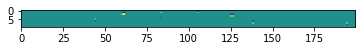

In [9]:
example_k_links = example_conf[0]
plt.imshow(example_k_links[0])

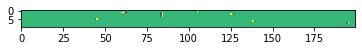

In [10]:
plt.imshow(example_k_links[1])

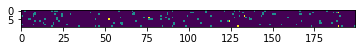

In [11]:
example_l_links = example_conf[1]
plt.imshow(example_l_links[1])

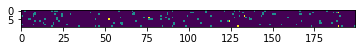

In [12]:
plt.imshow(example_l_links[1])

In [13]:
dataset.data[0]["conf"].size()

torch.Size([2, 2, 10, 200])

In [14]:
"""plot phase transition"""

ns = torch.zeros(len(dataset.data))
phi2s = torch.zeros(len(dataset.data))
mus = torch.zeros(len(dataset.data))

"plot observables against mu"
for i in range(len(dataset.data)):
    
    #conf = dataset.data[i]["conf"]
    #k_links = conf[0]
    #l_links = conf[1]
    
    phi2 = dataset.data[i]["phi2"]
    n = dataset.data[i]["n"]
    
    phi2s[i] = phi2
    ns[i] = n
    
    mu = dataset.data[i]["mu"]
    mus[i] = mu

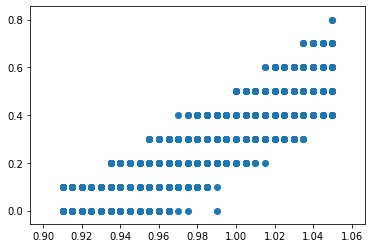

In [15]:
plt.scatter(mus, ns)

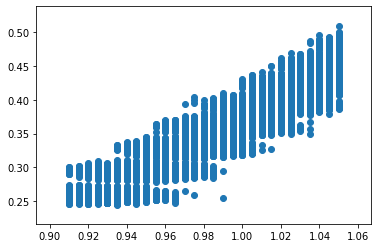

In [16]:
plt.scatter(mus, phi2s)

In [17]:
unique_mus = np.unique(mus)
num_mus = len(unique_mus)

In [18]:
##to be able to plot the observables against mu, they have to be sorted with respect to it
phi2s_mu = []
ns_mu = []

for mu_val in unique_mus:
    ##find which examples have a particular mu value (mu_val)
    mu_loc = np.where(mus == mu_val)[0]
    ##find the labels and prediction of observables which correspond to these examples
    phi2_mu = phi2s[mu_loc]
    n_mu = ns[mu_loc]
    
    phi2s_mu.append(phi2_mu)
    ns_mu.append(n_mu)

In [19]:
print(phi2s_mu)

[tensor([0.2511, 0.2618, 0.2576,  ..., 0.2588, 0.2583, 0.2575]), tensor([0.2568, 0.2521, 0.2624,  ..., 0.2621, 0.2564, 0.2557]), tensor([0.2604, 0.2566, 0.2559,  ..., 0.2593, 0.2563, 0.2505]), tensor([0.2592, 0.2549, 0.2559,  ..., 0.2577, 0.2616, 0.2536]), tensor([0.2990, 0.2997, 0.2660,  ..., 0.2590, 0.2560, 0.2559]), tensor([0.2581, 0.2580, 0.2598,  ..., 0.2878, 0.3015, 0.2970]), tensor([0.2528, 0.2561, 0.2562,  ..., 0.2534, 0.2518, 0.2553]), tensor([0.2558, 0.2889, 0.2941,  ..., 0.2677, 0.2597, 0.2565]), tensor([0.2912, 0.3295, 0.3305,  ..., 0.3243, 0.3188, 0.2987]), tensor([0.2905, 0.2912, 0.2542,  ..., 0.2961, 0.2948, 0.2939]), tensor([0.2948, 0.3233, 0.2974,  ..., 0.2994, 0.2559, 0.2576]), tensor([0.2511, 0.2605, 0.2884,  ..., 0.3295, 0.3276, 0.2959]), tensor([0.2909, 0.2867, 0.2920,  ..., 0.3231, 0.3297, 0.3228]), tensor([0.2593, 0.3283, 0.3305,  ..., 0.3592, 0.3613, 0.3328]), tensor([0.3277, 0.3292, 0.3253,  ..., 0.3233, 0.3627, 0.3631]), tensor([0.3326, 0.3666, 0.3645,  ..., 0

In [20]:
#phi2s_mu = np.array(phi2s_mu)
#ns_mu = np.array(ns_mu)

In [21]:
phi2s_mu = torch.stack(phi2s_mu)
ns_mu = torch.stack(ns_mu)

In [22]:
mean_phi2s_mu = torch.zeros(len(unique_mus))
mean_ns_mu = torch.zeros(len(unique_mus))
std_phi2s_mu = torch.zeros(len(unique_mus))
std_ns_mu = torch.zeros(len(unique_mus))

for mu_i in range(len(unique_mus)):
    mean_phi2s_mu[mu_i] = torch.mean(phi2s_mu[mu_i])
    mean_ns_mu[mu_i] = torch.mean(ns_mu[mu_i])
    std_phi2s_mu[mu_i] = torch.std(phi2s_mu[mu_i])
    std_ns_mu[mu_i] = torch.std(ns_mu[mu_i])
    

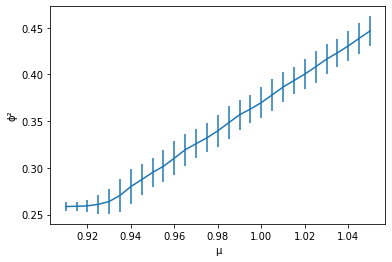

In [23]:
#plt.plot(unique_mus, mean_phi2s_mu)
plt.errorbar(unique_mus, mean_phi2s_mu, yerr=std_phi2s_mu)
plt.xlabel("μ")
plt.ylabel("ϕ²")
plt.savefig(f"phi2_mu{lat_size}.png")

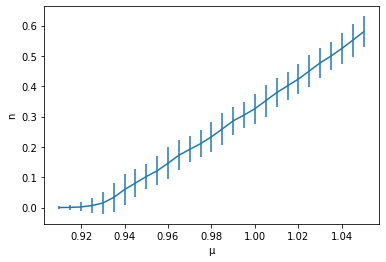

In [24]:
#plt.plot(unique_mus, mean_ns_mu)
plt.errorbar(unique_mus, mean_ns_mu, yerr=std_ns_mu)
plt.xlabel("μ")
plt.ylabel("n")
plt.savefig(f"n_mu{lat_size}.png")

In [25]:
"""plot k and l link distribution"""


##dataset_links_shape = np.concatenate(([len(dataset)],[len(lat_size)],lat_size))
#dataset_links_shape = np.concatenate(([len(dataset)],conf_size))
#dataset_k_links = torch.zeros(*dataset_links_shape, dtype=int)
#dataset_l_links = torch.zeros(*dataset_links_shape, dtype=int)
#print(dataset_k_links.size())

'plot k and l link distribution'

In [26]:
len(dataset.file_confs)

29

In [27]:
dataset.file_confs[0].size()

torch.Size([5000, 2, 2, 10, 200])

In [28]:
dataset_confs = torch.cat(tuple(dataset.file_confs), dim=0)
print(dataset_confs.size())

torch.Size([145000, 2, 2, 10, 200])


In [29]:
dataset_k_links = dataset_confs[:,0]
dataset_l_links = dataset_confs[:,1]
print(dataset_k_links.size())
print(dataset_l_links.size())

torch.Size([145000, 2, 10, 200])
torch.Size([145000, 2, 10, 200])


In [30]:
#for i in tqdm(range(len(dataset))):
#    dataset_k_links[i] = dataset.data[i]["conf"][0]
#    dataset_l_links[i] = dataset.data[i]["conf"][1]

In [31]:
    #dataset.data[:]["conf"][0]

In [39]:
#dataset_k_links_flat = torch.flatten(dataset_k_links, start_dim=1)
#dataset_l_links_flat = torch.flatten(dataset_l_links, start_dim=1)

dataset_k_links_flat = dataset_k_links.reshape(dataset_l_links.size()[0], -1)
dataset_l_links_flat = dataset_l_links.reshape(dataset_l_links.size()[0], -1)

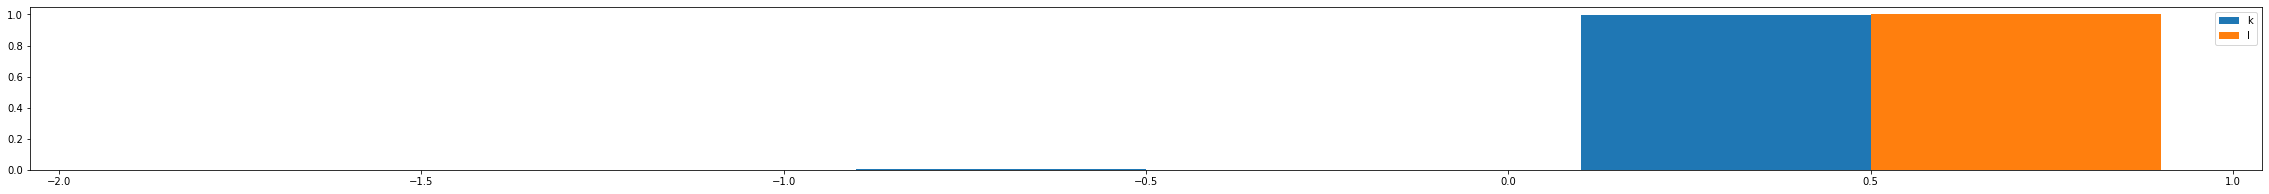

In [40]:
conf_i = 0

max_k_link = torch.max(dataset_k_links_flat[conf_i])
min_k_link = torch.min(dataset_k_links_flat[conf_i])

bins = np.arange(min_k_link, max_k_link, dtype=int)

plt.hist([np.array(dataset_k_links_flat[conf_i].flatten()),np.array(dataset_l_links_flat[conf_i].flatten())], bins=bins, density=True, label=["k", "l"])
plt.legend(loc='upper right')

In [41]:
conf_i_start = 0
conf_i_stop = 10
conf_range = np.arange(conf_i_start, conf_i_stop, dtype=int)

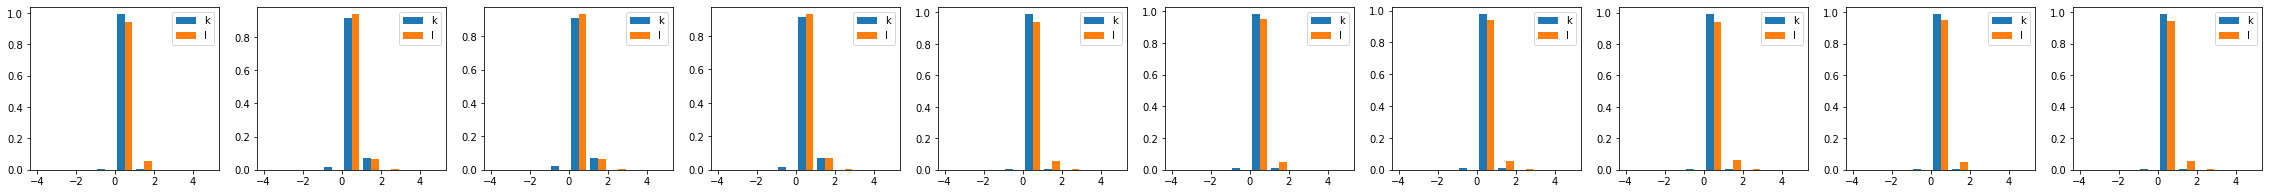

In [42]:
plt.rcParams['figure.figsize'] = [40, 3]
fig, ax = plt.subplots(nrows=1, ncols=len(conf_range))

max_k_link = torch.max(dataset_k_links_flat)
min_k_link = torch.min(dataset_k_links_flat)

bins = np.arange(min_k_link, max_k_link, dtype=int)

for i in range(len(conf_range)):
    conf_i = conf_range[i]
    ax[i].hist([np.array(dataset_k_links_flat[conf_i].flatten()),np.array(dataset_l_links_flat[conf_i].flatten())], bins=bins, density=True, label=["k", "l"])
    ax[i].legend(loc='upper right')

In [43]:
#dataset_k_links_allflat = torch.flatten(dataset_k_links_flat, start_dim=0)
#dataset_l_links_allflat = torch.flatten(dataset_l_links_flat, start_dim=0)

dataset_k_links_allflat = dataset_k_links_flat.reshape(-1)
dataset_l_links_allflat = dataset_l_links_flat.reshape(-1)


RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 4640000000 bytes. Error code 12 (Cannot allocate memory)


In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]

max_k_link = torch.max(dataset_k_links_allflat)
min_k_link = torch.min(dataset_k_links_allflat)

bins = np.arange(min_k_link, max_k_link, dtype=int)

plt.hist([np.array(dataset_k_links_allflat),np.array(dataset_l_links_allflat)], bins=bins, density=True, label=["k", "l"])
plt.legend(loc='upper right')

In [ ]:
"""plot k l link distribution per μ"""
#print(dataset.data[0]["mu"])
mu_val = dataset.data[0]["mu"]

mu_confs = [conf_dict["conf"] for conf_dict in dataset.data if conf_dict["mu"] == mu_val]
print(len(mu_confs))

In [ ]:
mu_confs = torch.stack(mu_confs)

In [ ]:
print(mu_confs.size())

In [ ]:
all_mu_l_links = mu_confs[:,1]
all_mu_k_links = mu_confs[:,0]

In [ ]:
type(all_mu_k_links[0])

In [ ]:
max_k_link = torch.max(all_mu_k_links.flatten())
min_k_link = torch.min(all_mu_k_links.flatten())
bins = np.arange(min_k_link, max_k_link, dtype=int)

plt.hist([np.array(all_mu_k_links.flatten()),np.array(all_mu_l_links.flatten())], bins=bins, density=True, label=["k", "l"])
plt.legend(loc='upper right')
plt.ylabel(f"k and l link distribution μ = {mu_val}")

In [ ]:
"""count all mus"""

mus = torch.zeros(len(dataset.data))

for i in tqdm(range(len(dataset.data))):
    mus[i] = dataset.data[i]["mu"]
    
unique_mus = torch.unique(mus)

In [ ]:
print(unique_mus)

In [ ]:
all_mu_k_links = []
all_mu_l_links = []
all_mu_f = []

for mu_i in range(len(unique_mus)):
    mu_val = unique_mus[mu_i]
    print(mu_val)
    
    mu_confs = [conf_dict["conf"] for conf_dict in dataset.data if conf_dict["mu"] == mu_val]
    #print(len(mu_confs))
    """calculate f function"""
    #f = f_calc(torch.flip(dataset.data[0]["conf"][0], dims=[0]), torch.flip(dataset.data[0]["conf"][1], dims=[0]), lat_size=lat_size, dims=len(lat_size))
    #torch.all(f %2 == 0)
    mu_f = torch.zeros(len(mu_confs), *lat_size)
    for mu_conf_i in range(len(mu_confs)):
        mu_f[mu_conf_i] = f_calc(k_links=torch.flip(mu_confs[mu_conf_i][0], dims=[0]),
                                 l_links=torch.flip(mu_confs[mu_conf_i][1], dims=[0]),
                                 lat_size=lat_size, dims=len(lat_size))
    
    mu_confs = torch.stack(mu_confs)
    print(mu_confs.size())
    
    mu_k_links = mu_confs[:,0]
    mu_l_links = mu_confs[:,1]
    
    print(mu_k_links.size())
    #print(len(mu_l_links))

    all_mu_k_links.append(np.array(mu_k_links))
    all_mu_l_links.append(np.array(mu_l_links))
    all_mu_f.append(np.array(mu_f))

print(len(all_mu_k_links))
print(len(all_mu_k_links[0]))
#all_mu_k_links = torch.tensor(all_mu_k_links)
#all_mu_k_links.size()

In [ ]:
np.all(all_mu_f[0] %2 == 0)

In [ ]:
"""plot k l link distribution per μ"""

plt.rcParams['figure.figsize'] = [10, 10]

#max_k_link = torch.max(all_mu_k_links)
#min_k_link = torch.min(all_mu_k_links)
all_mu_k_links_flat = [mu_k_links.flatten() for mu_k_links in all_mu_k_links]
bins = np.arange(min_k_link, max_k_link, dtype=int)
mu_str_list = ["μ = " + str(mu.numpy()) for mu in unique_mus]

#plt.hist(all_mu_k_links_flat, bins=bins, density=True, label=mu_str_list)
plt.hist(all_mu_k_links_flat, density=True, label=mu_str_list)
plt.legend(loc='upper right')
plt.ylabel(f"k link distribution")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

import matplotlib.cm as cm
from matplotlib.colors import Normalize
#max_k_link = torch.max(all_mu_k_links)
#min_k_link = torch.min(all_mu_k_links)
all_mu_k_links_flat = [mu_k_links.flatten() for mu_k_links in all_mu_k_links]
bins = np.arange(min_k_link, max_k_link, dtype=int)
mu_str_list = ["μ = " + str(mu.numpy()) for mu in unique_mus]

#plt.hist(all_mu_k_links_flat, bins=bins, density=True, label=mu_str_list)
#plt.hist(all_mu_k_links_flat, density=True, label=mu_str_list)
my_cmap = cm.get_cmap("jet")
min_mu = torch.min(unique_mus).detach().numpy()
max_mu = torch.max(unique_mus).detach().numpy()
my_norm = Normalize(vmin=min_mu, vmax=max_mu)
#plt.bar(bins, all_mu_k_links_flat, density=True, label=mu_str_list, color=my_cmap(my_norm(unique_mus)))
#for i in tqdm(range(len(unique_mus))):
#    plt.hist(all_mu_k_links_flat[i], density=True, label=mu_str_list[i], color=my_cmap(my_norm(unique_mus[i])))
plt.hist(all_mu_k_links_flat, bins=bins, density=True, label=mu_str_list, align="left", color=my_cmap(my_norm(unique_mus)))
plt.xticks(bins)
plt.legend(loc='upper left')
plt.ylabel(f"k link distribution")
plt.savefig(f"k_hist_mu{lat_size}.png")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
#max_k_link = torch.max(all_mu_k_links)
#min_k_link = torch.min(all_mu_k_links)
all_mu_l_links_flat = [mu_l_links.flatten() for mu_l_links in all_mu_l_links]

min_l_link = 0
max_l_link = torch.max(mu_l_links)

bins = np.arange(min_l_link, max_l_link, dtype=int)
    
#plt.hist(all_mu_l_links_flat, bins=bins, density=True, label=mu_str_list)
plt.hist(all_mu_l_links_flat, density=True, label=mu_str_list)
plt.legend(loc='upper right')
plt.ylabel(f"l link distribution")

In [ ]:
#plt.hist(all_mu_k_links_flat, bins=bins, density=True, label=mu_str_list)
#plt.hist(all_mu_k_links_flat, density=True, label=mu_str_list)

bins = np.arange(min_l_link, max_l_link, dtype=int)

my_cmap = cm.get_cmap("jet")
min_mu = torch.min(unique_mus).detach().numpy()
max_mu = torch.max(unique_mus).detach().numpy()
my_norm = Normalize(vmin=min_mu, vmax=max_mu)
#plt.bar(bins, all_mu_k_links_flat, density=True, label=mu_str_list, color=my_cmap(my_norm(unique_mus)))
#for i in tqdm(range(len(unique_mus))):
#    plt.hist(all_mu_k_links_flat[i], density=True, label=mu_str_list[i], color=my_cmap(my_norm(unique_mus[i])))
plt.hist(all_mu_l_links_flat, bins=bins, density=True, label=mu_str_list, align="left", color=my_cmap(my_norm(unique_mus)))
#plt.bar(all_mu_l_links_flat, density=True, label=mu_str_list, color=my_cmap(my_norm(unique_mus)))
plt.xticks(bins)
plt.legend(loc='upper right')
plt.ylabel(f"l link distribution")
plt.savefig(f"l_hist_mu{lat_size}.png")

In [ ]:
max_f = np.max(np.array(mu_f))
min_f = np.min(np.array(mu_f))
all_mu_f_flat = [mu_f.flatten().astype(int) for mu_f in all_mu_f]

bins = np.arange(min_f, max_f, dtype=int)

plt.hist(all_mu_f_flat, bins=bins, density=True, label=mu_str_list)
#plt.hist(all_mu_f_flat, density=True, label=mu_str_list)
plt.legend(loc='upper right')
plt.ylabel(f"f distribution")

In [ ]:
#plt.hist(all_mu_k_links_flat, bins=bins, density=True, label=mu_str_list)
#plt.hist(all_mu_k_links_flat, density=True, label=mu_str_list)
my_cmap = cm.get_cmap("jet")
min_mu = torch.min(unique_mus).detach().numpy()
max_mu = torch.max(unique_mus).detach().numpy()
my_norm = Normalize(vmin=min_mu, vmax=max_mu)
#plt.bar(bins, all_mu_k_links_flat, density=True, label=mu_str_list, color=my_cmap(my_norm(unique_mus)))
#for i in tqdm(range(len(unique_mus))):
#    plt.hist(all_mu_k_links_flat[i], density=True, label=mu_str_list[i], color=my_cmap(my_norm(unique_mus[i])))
plt.hist(all_mu_f_flat, bins=bins, density=True, label=mu_str_list, align="left", color=my_cmap(my_norm(unique_mus)))
#plt.xticks(np.arange(0,np.max(all_mu_f_flat), 2))
plt.xticks(np.arange(0,8,2))
plt.legend(loc='upper right')
plt.ylabel(f"f distribution")
plt.savefig(f"f_hist_mu_{lat_size}.png")

In [ ]:
W = np.loadtxt("W.txt")
W_obs_ratio = np.loadtxt("W_obs_ratio.txt")

In [ ]:
plt.plot(np.arange(0,len(W), dtype=int), W)

In [ ]:
W_stop_i = 20
plt.plot(np.arange(0,W_stop_i, dtype=int), W[:W_stop_i])

In [ ]:
W_stop_i = 50
i_reg = 4
lin_W = [W_obs_ratio[0], W_obs_ratio[i_reg]]
print(lin_W)
plt.plot(np.arange(0,W_stop_i, dtype=int), W_obs_ratio[:W_stop_i], label="W[f+2]/W[f]")
plt.vlines(x=[0,i_reg], ymin=np.min(W_obs_ratio), ymax=np.max(W_obs_ratio[:W_stop_i]), linestyles="--", label="dataset regime")
#plt.plot([0, i_reg], lin_W, linestyle="--", label="linear regression f=[0,8]")
plt.ylabel("W[f+2]/W[f]")
plt.xlabel("f/2")
plt.legend(loc="lower right")
plt.savefig("W_obs_ratio.png")

In [ ]:
import scipy as scp

In [ ]:
W_obs_ratio[:i_reg]

In [ ]:
lin_reg = scp.stats.linregress(range(len(W_obs_ratio[:i_reg])), W_obs_ratio[:i_reg])
print(lin_reg)

In [ ]:
lin_reg.stderr

In [ ]:
W_stop_i = 5
i_reg = 4
lin = np.zeros(W_stop_i)
k = lin_reg.slope
d = lin_reg.intercept
for i in range(0,W_stop_i):
    lin[i] = k*i + d
    
plt.plot(np.arange(0,W_stop_i, dtype=int), W_obs_ratio[:W_stop_i], label="W[f+2]/W[f]")
plt.plot(np.arange(0,W_stop_i, dtype=int), lin, linestyle="--", label="linear regression, σ=0.005")
plt.ylabel("W[f+2]/W[f]")
plt.xlabel("f/2")
plt.legend()
plt.savefig("W_obs_ratio_lin.png")

In [ ]:
dev = [abs(lin[i] - W_obs_ratio[i]) for i in np.arange(0,W_stop_i, dtype=int)]
print(dev)

In [ ]:
"""test whether relevant links are really attached to each lattice site"""
test_lat_size = [3,3]
test_k_links = torch.ones(2,*test_lat_size, dtype=int)
#test_k_links[0] = torch.arange(start=0, end=np.prod(test_lat_size)).reshape(*test_lat_size)
test_k_links = torch.arange(start=0, end=np.prod(test_k_links.shape), dtype=int).reshape(test_k_links.shape)

print(test_k_links)

In [ ]:
print(torch.flip(test_k_links,dims=[0]))

In [ ]:
print(test_k_links[0])

In [ ]:
print(test_k_links[1])

In [ ]:
full_test_k_links = link_per_lat_point(test_k_links, test_lat_size, len(test_lat_size))
print(full_test_k_links)

In [ ]:
print(full_test_k_links[2])

In [ ]:
print(full_test_k_links[3])

In [ ]:
"""test calc_f"""
conf_i = 0
test_k_links = dataset_k_links[conf_i]
test_l_links = dataset_l_links[conf_i]

test_k_links = torch.flip(test_k_links, dims=[0])
test_l_links = torch.flip(test_l_links, dims=[0])

test_f = torch.zeros(*lat_size, dtype=int)

test_f = f_calc(test_k_links, test_l_links, lat_size, len(lat_size))

In [ ]:
#print(test_f)

In [ ]:
"""plot f and mean f distribution"""

In [ ]:
dataset_f = torch.zeros(len(dataset),*lat_size, dtype=int)

for conf_i in tqdm(range(len(dataset))):
    
    test_k_links = dataset_k_links[conf_i]
    test_l_links = dataset_l_links[conf_i]

    test_k_links = torch.flip(test_k_links, dims=[0])
    test_l_links = torch.flip(test_l_links, dims=[0])
    
    dataset_f[conf_i] = f_calc(test_k_links, test_l_links, lat_size, len(lat_size))

In [ ]:
#conf_i = 0
#dataset_f[conf_i]

In [ ]:
np.all(dataset_f[conf_i].numpy() % 2 == 0)

In [ ]:
np.all(dataset_f.numpy() % 2 == 0)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
conf_i = 0
sns.heatmap(dataset_f[conf_i], cmap="BuGn")

In [ ]:
conf_i = 0
dataset_f_flat = dataset_f.flatten(start_dim=1)
dataset_f_allflat = dataset_f.flatten(start_dim=0)

f_max = torch.max(dataset_f_allflat)

bins = np.arange(0,f_max+2, 2)

plt.hist(dataset_f_flat[conf_i], bins=bins)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 3]

conf_start = 0
conf_stop = 10

conf_range = np.arange(conf_start, conf_stop)

f_max = torch.max(dataset_f_allflat)

bins = np.arange(0,f_max+2, 2)

fig, ax = plt.subplots(1, len(conf_range))

for i in range(len(conf_range)):
    
    conf_i = conf_range[i]
    
    ax[i].hist(dataset_f_flat[conf_i], bins=bins)

In [ ]:
f_max = torch.max(dataset_f_allflat)

bins = np.arange(0,f_max+2, 2)

plt.hist(dataset_f_allflat, bins=bins)